<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
04 Random Variables
<a class="tocSkip">   
</h1>  

## <span style='background:yellow; color:red'> Remember:<a class="tocSkip"> </span>     

+ Navigate to your `fmad2223` folder in the console/terminal.  
+ Execute `git pull origin main` to update the code
+ **Do not modify the files in that folder**, copy them elsewhere

In [230]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()


## Discrete Random Variables

### Theoretical Models Vs Empirical Data

+ We begin with a simple mental experiment. Imagine we roll a dice (a honest not-loaded one) a million times and we look at the relative frequencies of every possible result. What is your guess for the numbers in the second row of this table?  
$$
\quad\\
\begin{array}{|c|c|c|c|c|c|c|}
\hline
\text{value} & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline
\text{relative frequency} & ? & ? & ? & ? & ? & ? \\
\hline
\end{array}
\quad\\
$$
    Those values that you clearly have in your mind are a **theoretical model** (your *prior*) of the outcome of this experiment. Of course, when we run the experiment and we get **empirical data** we do not expect the results to be a perfect match with the theory, because this is a **random experiment**. 

+ And that is precisely the notion of a discrete random variable $X$: *a theoretical model for the outcome of a random experiment with a finite number of possible outcomes.* More precisely (from the mathematical point of view) the result of the experiment is a discrete/countable set.

+ Therefore, in order to describe a discrete random variable $X$ we need to provide its **probability density table or function**. That is a table of all the possible values of $X$ and their corresponding probabilities:
$$
\quad\\
\begin{array}{|c|c|c|c|c|c|c|}
\hline
\text{value of }X: & x_1 & x_2 & \cdots & x_k \\
\hline
\text{Probability for that value: }P(X = x_i) & p_1 & p_2 & \cdots & p_k \\
\hline
\end{array}
\quad\\
$$
where $p_1 + p_2 + \cdots + p_k = 1$. Sometimes we will use *function notation* $f(x_i) = P(X = x_i)$, specially when we want to give a *formula* for the probability. We will soon see examples. 

+ The probability density function is sometimes called *probability mass function*. Thus you may see it abreviated to pdf or pmf, depending on the authors. For example, SciPy uses `pmf`.


+ **Exercise:** use NumPy to do the experiment with a million dice rolls and get their absolute and relative frequency table.  

In [231]:
# %load "./exclude/S04-001.py"

### Mean and Variance for a Discrete Random Variable

+ A discrete random variable $X$ is therefore a theoretical model for the distribution of values of a random variable in a population. The **population mean** or **expectation** of $X$ represents the mean or average of the values that $X$ takes *in the population*. It is denoted with the greek letter $\mu$ and also wit the symbol $E(X)$. When we need to clarify the random variable involved we will sometimes use a symbol such as $\mu_X$.

+ Similarly we define the **population variance** $\sigma^2$, using all the values in the population. Both $\mu$ and $\sigma^2$ should be considered as abstract or also *hidden* values that we want to *estimate*, getting approximate values, but we can not actually obtain with certainty.

+ One of the main goals of Statistics is to use sample data to estimate parameters of a population. Suppose that the discrete variable $X$ takes $n$ different values $x_1, x_2,\ldots, x_k$. If we have a sample of $X$ and the absolute frequencies **in that sample** are $f_1, f_2, \ldots,f_k$, then we can use that sample to give an estimate of the *population mean* $\mu$ using the *sample mean*: 
$$
\quad\\
\bar X = \dfrac{x_1 f_1 + \cdots + x_k f_k}{n} = x_1 fr_1 + \cdots + x_k fr_k
\quad\\
$$  
  where $fr_1, \ldots, fr_k$ are the *sample relative frequencies*. It is very important that you realize that $\bar X$ is an empirical quantity that comes out of a sample. Therefore it is something that we can compute using that sample that we have. On the other hand $\mu$ is a theoretical quantity because it belongs to the population and we do not have access to the population (we would not be needing Statistic if we did!).

+ Now, looking at the last formula, recall that the relative frequencies are closely related with probabilities. In fact, the idea of probability first appeared as a theoretical model of the relative frequency. And so if we want to give a theoretical definition of the mean or expectation of a discrete random variable the only sensible choice is this:
<h5 style= 'text-align:center;color:#ecac00'>
Mean of a Discrete Random Variable $X$
<a class="tocSkip">
</h5>
$$
\quad\\
\fbox{$\displaystyle\mu = E(X) = x_1 p_1 + \cdots + x_k p_k$}
\quad\\
$$
  That is, we have simply replaced relative frequencies with probabilities to go from empirical to theoretical. A similar reasoning lead to this expression for the:
<h5 style= 'text-align:center;color:#ecac00'>
Variance of a Discrete Random Variable $X$
<a class="tocSkip">
</h5>
$$
\quad\\
\fbox{$\displaystyle\sigma^2 = \operatorname{Var}(X) = 
(x_1 - \mu)^2 p_1 + \cdots + (x_k - \mu)^2 p_k$}
\quad\\
$$    

    The positive square root $\sigma$ of the variance is called the **standard deviation** of $X$.

**Exercise:** use Python (with NumPy or pandas) to compute $\mu$ and $\sigma^2$ for the random variable $X$ representing the outcome of a honest dice. 

In [232]:
# %load "./exclude/S04-002.py"

### Sampling Discrete Random Variables with Python


+ Suppose we have a discrete random variable $X$ with values $x_1, \ldots, x_k$ and corresponding probabilities $p_1, \ldots, p_k$. In order to run simulations of our experiments with $X$ we would like to be able to use Python to generate synthetic random samples of $X$, according to its probability distribution. We can do that with this code

In [233]:
values_X = np.arange(1, 7)
probs_X = np.ones(shape = 6) / 6

np.random.choice(values_X, 10, p=probs_X)

array([2, 1, 5, 2, 4, 4, 6, 1, 1, 6])

### Operations on Discrete Random Variables

+ **Example:** Assume that the population of interest is the set of households in a given city. And let the random variable $X$ represent the annual home insurance paid by each household. Similarly, let $Y$ represent the annual life insurance for each household. When we want to obtain the total amount of both insurance payments combined we need to consider the sum of the random variables $X + Y$. In many examples like this we would like to use the information about $X$ and $Y$ to obtain the properties of their sum $X + Y$ without having to redo the calculation. 

+ More generally, we are often interested in *linear combinations* of random variables, such as 
$$
\quad\\
a\,X + b\,Y,\qquad\text{ where }a\text{ and }b\text{ are numeric coefficients.}
\quad\\
$$

+ The mean or expectation of such a linear combination is simply the same linear combination of the expectations  of the individual variables:
$$
\quad\\
E(a\,X + b\,Y) = a\,E(X) + b\,E(Y)
\quad\\
$$

+ For the variance things get a little more complicated, because we need the notion of independence. Informally, $X$ and $Y$ are independent if knowledge about the value of $X$ does not affect the probability of the values of $Y$. The **covariance** of $X$ and $Y$ is
$$
\quad\\
\operatorname{cov}(X, Y) = E((X - \mu_X)(Y - \mu_Y))
\quad\\
$$
and the most general result says that
$$
\quad\\
\sigma^2(a\,X + b\, Y) = a^2\,\sigma^2_X + b^2\,\sigma^2_Y + 2\,a\,b\, \operatorname{cov}(X, Y)
\quad\\
$$
+ When $X$ and $Y$ are independent it turns out that $\operatorname{cov}(X, Y) = 0$ (creful, it does not work the other way round) and therefore **in the independence case** we get a simpler formula:
$$
\quad\\
\sigma^2(a\,X + b\, Y) = a^2\,\sigma^2_X + b^2\,\sigma^2_Y
\quad\\
$$



### The Distribution Function

+ The **(cumulative) distribution function (cdf)** $F_X$ of a random variable $X$ (discrete or continuous) is defined by:
$$
\quad\\
F_X(k) = P(X\leq k)\qquad\text{ for any number }k
\quad\\
$$
You may think of $F(k)$ as the theoretical version of the table of cumulative relative frequencies. Therefore, it answers the question "*what is the probability that $X$ takes a value $\leq k$?*"

+ Because they are probabilities and because of their cumulative nature the typical graph for the distribution function of a discrete variable is a **stair shaped** graph like this one, climbing from 0 to 1 with a jump at each value of $X$ equal to the probability of that value:
![](fig/04-01-FuncionDistribucionVariableAleatoria.png)

## Binomial Variables

### Bernouilli Random Variables

+ A Bernouilli random variable is a very simple discrete random variable that only takes two values, 0 and 1, with the following probability table:
$$
\quad\\
\begin{array}{|l|c|c|}
    \hline
    \rule{0cm}{0.5cm}\text{Value of }X:&1&0\\
    \hline
    \rule{0cm}{0.5cm}\text{Probability for that value:}& p & q = 1 - p\\
    \hline
\end{array}
\quad\\
$$
These values 1 and 0 are (arbitrarily) called *success* and *failure* respectively.

+ These Bernouilli type variables are useful because they are the building blocks for more complex types of variables, as we will soon see.

+ **Example:** the variable $X = $ "number of appearances of six when rolling a single dice" is a Bernouilli variable with $p = 1/6$ and $q = 5/6$. We denote this with $X\sim Bernouilli(p)$ (the symbol $\sim$ is read "is of type ...")

+ The mean of a random variable $X\sim Bernouilli(p)$ is $\mu = p$, and its variance is $\sigma^2 = p\cdot q = p(1 - p)$.


### Binomial Random Variables

+ **Example:** Suppose that we roll a dice 11 times and we use that experiment (the whole set of 11 rolls of the dice) to define a random variable $X$ where:
$$
\quad\\
X = \textit{number of appearances of 6 in those 11 rolls of the dice}
\quad\\
$$

+ The situation in this example has these characteristics:

  $(1)$ There is a **basic experiment**, rolling a dice in this case, that gets **repeated $n$ times** (in the example $n = 11$).  
  
  $(2)$  The $n$ repeated basic experiments are **independent** of each other. That is, the outcome of one of the experiments is not affected in any way by the outcome of the others.
  
  $(3)$  Every individual instance or trial of the basic experiment can only result in **success** (in the example, rolling a 6) represented with value $1$; o in **failure** (not rolling a 6) represented with value 0.  
  
  $(4)$  The **probability of success** for every trial is $p$ and that for failure is therefore $q = 1- p$. In the example $p = 1/6, q= 5/6$.  
  
  $(5)$ Finally, **our variable $X$ is the number of successful trials (with outcome 1) in the whole set of $n$ independent trials**.

+ **Definition of Binomial Variable**  
  A discrete random variable  $X$ with the above characteristics is a binomial variable with parameters $n$ and $p$, and we will use the symbol $X \sim B(n, p)$ to denote this. 

### Experiments with Binomial Variables using Python

+ Let us see an example of a binomial variable. We will use the `prevalentHyp` variable in the `framingham` table that we have used in previous sessions. The variable takes the value 1 if the patient is hypertensive and 0 otherwise. Keep in mind that 1 and 0 are arbitrary, and so in this example *success* actually means that the patient is in fact hypertensive. 

+ **Exercise:**  
    (a) Load the data table into the `framingham` pandas DataFrame. You have done this before.  
    (b) Find the probability that a randomly chosen patient is hypertensive, and call it $p$.  
    (c) Instead of choosing a single patient, suppose that we choose seven patients at random and with replacement. Let $X$ denote the number of hypertensive patients among those seven. What values can this variable $X$ actually take?  
    (d) Use Python to choose a sample of seven patients (with replacement) and count the number of hypertensive patients in that sample.  
    (e) Iterate the previous step $N = 50000$ times and store the 50000 results in a NumPy array called `X_samples`. Get a relative frequency table of the different values in `X_samples.`  
(f) Choose the right plot to illustrate the contents of `X_samples`.

### Probability Density for Binomial Variables

+ The table of relative frequencies that you obtained in the previous exercise is an empirical approximation of the following expression for the following:
$$
\fbox{
$
\quad\\
\textbf{Theoretical probability density of a binomial variable }X\sim B(n, p)
\quad\\
\quad\quad\quad\quad
P(X = k) =\displaystyle\binom{n}{k}\,p^k\,q^{(n -k)}\quad\text{ for }\quad k = 0, 1, 2, \ldots, n
$
}
$$
where we recall $q = 1 - p$. Also the definition of the *binomial coefficient* is:
$$
\dbinom{n}{k} = \frac{\overbrace{n\left( n-1\right) \left( n-2\right) \cdots \left( n-k+1\right) }^{k\mbox{ factors}}}{k!}
$$
where $k! = k\cdot(k - 1)\cdot(k - 2)\cdot\,\cdots\,\cdot 2\cdot 1$ is the factorial of $k$.

+ Luckily you will not have to compute these by hand, Python will do the hard work for us. And it also gives us the chance to see how *painful* these binomial coefficients turn out to be. 

+ Let us use SciPy to obtain $\dbinom{1000}{20}$. Note that these are not unreasonably large numbers, and yet:

In [234]:
from scipy import special
N = 100
k = 20
special.comb(N, k, exact=True)

535983370403809682970

+ This kind of result illustrates the fact that we should give up any hope of using the binomial distribution *by hand*. 

### Mean and Variance of a Binomial Random Variable

+ If $X \sim B(n, p)$ then:
$$
\quad\\
\fbox{
$\begin{cases}
\mu = n\cdot p\\[3mm]
\sigma^2 = n\cdot p\cdot q
\end{cases}$}
\quad\\
$$
Both results are very easy consequences of the fact that a $B(n, p)$ binomial is the sum of $n$ independent Bernouilli trials with the same $p$.

### The binomial in Python

+ For further details please check the [SciPy documentation website](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom).

+ To compute concrete probability values of a binomial variable we use it *probability mass function (pmf)*, which is a fancy name for the table of probabilities.

+ **Example:** Let $X\sim B(7, 1/4)$ and let us compute the probability $P(X = 3)$.

In [235]:
from scipy import stats
n = 7
p = 0.25
k = 3
stats.binom.pmf(k, n, p)

0.17303466796875

+ We can also *freeze* the binomial variable and use the frozen version to compute this value but also the mean or variance:

In [236]:
X = stats.binom(n, p)

print("Probability for k = ", k, "is", X.pmf(k))

X_mean = X.mean()
X_var = X.var()

print("X_mean =", X_mean)
print("X_var =", X_var)

Probability for k =  3 is 0.17303466796875
X_mean = 1.75
X_var = 1.3125


+ To plot the probability mass of the distribution we often use a variant of the bar plot called a *stem and leaf* plot:

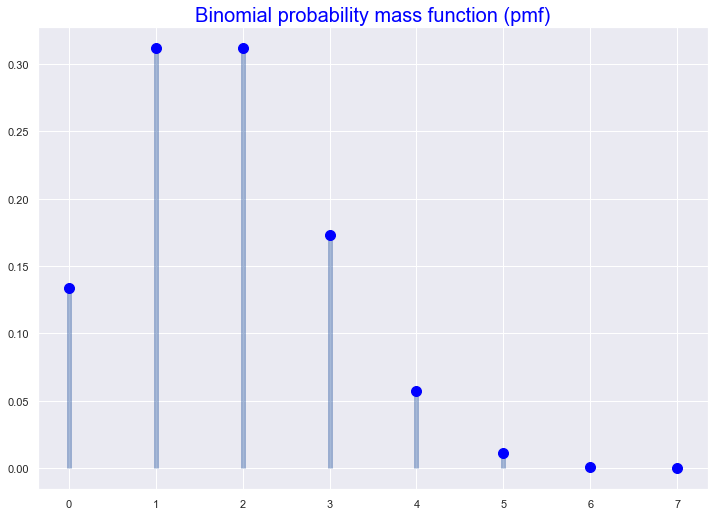

In [237]:
fig, ax = plt.subplots(1, 1)
# First we create arrays with all posible values for this variable...
x = np.arange(start = 0, stop = n + 1, step = 1)
# ... and their probabilities:
probs_x = stats.binom.pmf(x, n, p)
# The next comand plots the "leaf" part
ax.vlines(x, ymin = 0, ymax = probs_x, colors='b', lw=5, alpha=0.5)
# And this one plots the "stem"
ax.plot(x, probs_x, linestyle = '', marker = 'o', color ='blue', markersize=10)
getPlot = ax.set_title("Binomial probability mass function (pmf)", fontsize=20, color="blue")

+ The cumulative distribution function (cdf) is similarly plotted with:

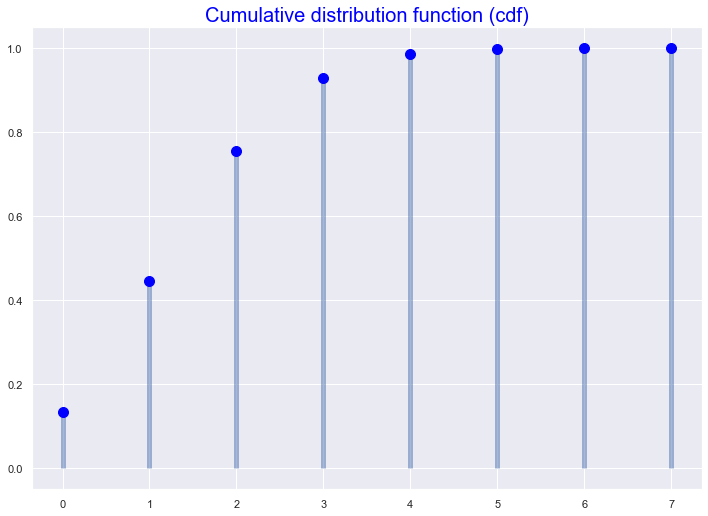

In [238]:
fig, ax = plt.subplots(1, 1)
x = np.arange(start = 0, stop = n + 1, step = 1)
# We replace probabilities with cumulative probabilities
cumul_probs_x = stats.binom.cdf(x, n, p)
ax.vlines(x, ymin = 0, ymax = cumul_probs_x, colors='b', lw=5, alpha=0.5)
ax.plot(x, cumul_probs_x, linestyle = '', marker = 'o', color ='blue', markersize=10)
getPlot = ax.set_title("Cumulative distribution function (cdf)", fontsize=20, color="blue")

+ **Random values from a binomial variable:** To generate random values of a binomial variable we will use either one of this methods:

    + The NumPy classical method with `np.random.binomial(n, p, size)` (set the random seed with `np.random.seed(2022)`)
    + The NumPy modern version with something like `np.random.default_rng(2022).binomial(n, p, size = 10)`.
    + The Scipy version with 

In [239]:
# NumPy legacy code
np.random.seed(2022)
print("Numpy legacy \n") 
print(np.random.binomial(n, p, size = 30))
print("--" * 12, "\n")
# NumPy current code
print("Numpy current code \n") 
print(np.random.default_rng(2022).binomial(n, p, size = 30))
print("--" * 12, "\n")
# Scipy
print("SciPy \n") 
print(stats.binom(n, p).rvs(size = 30))

Numpy legacy 

[0 2 0 0 2 2 3 2 3 2 3 3 3 4 1 2 1 2 4 0 2 1 1 2 0 2 3 1 1 2]
------------------------ 

Numpy current code 

[1 0 2 0 2 2 0 0 1 5 4 1 2 1 1 3 4 2 3 5 1 0 4 2 1 0 1 0 0 1]
------------------------ 

SciPy 

[2 1 4 0 3 1 2 3 1 4 0 0 1 1 2 2 2 2 0 3 0 3 0 1 1 1 4 0 1 3]


+ **Note about reproducibility:** If you run the previous cell multiple times you will notice that the SciPy results do not change. That is because SciPy is also affected by the NumPy random seed. However if you remove the seed from the `default_rng` you will notice that ironically the current version of NumPy is not affected by the legacy NumPy random seed generator. 

+ **Exercise:**    
    (a) use Python to get the theoretical probabilities for the binomial variable of the preceding exercise. Recall that $X$ = number of hypertensive patients in a sample (with replacement) of seven patients from the framingham data set.  
    (b) Compare the theoretical values with the relative frequencies that you obtained in that exercise for $N = 50000$ samples of size 7.

### The Binomial Zoo

+ There are infinitely many types of binomials, depending on the combination of values for $n$ and $p$. But we can single out three particular cases, each of them requiring a different approach.

#### Binomials with small $n$

+ For example, the $X\sim B(7, 1/4)$ that we have been using in the previous examples. Let us plot its probability distribution again, but this time we add a bar plot to the stem and leaf plot, to ease the comparison between the global shape of this binomial and the ones we will see below. The best way to work with a binomial like this is to use directly the pmf and cdf functions to get the probability values. 

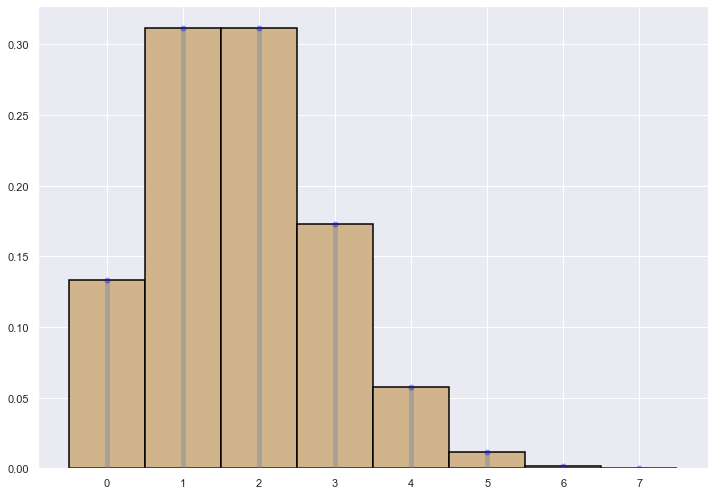

In [240]:
fig, ax = plt.subplots(1, 1)
n = 7
p = 0.25
# First we create arrays with all posible values for this variable...
x = np.arange(start = 0, stop = n + 1, step = 1)
# ... and their probabilities:
probs_x = stats.binom.pmf(x, n, p)
# The next comand plots the "leaf" part
ax.vlines(x, ymin = 0, ymax = probs_x, colors='b', lw=5, alpha=0.3)
ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
# And this one plots the "stem"
getPlot = ax.plot(x, probs_x, linestyle = '', marker = 'o', color ='blue', markersize=5, alpha=0.3)

#### Binomials with large $n$ but $p$ very small (close to $0$) or big (close to $1$).

+ In this case instead of using the binomial it is best to use the approximation provided by the **Poisson distribution**. We will talk about it later. Here we just plot an example with $n = 200$ but $p = 0.001$. *Please note that to improve the visualization we have reduced the range of the x axis to $[0, 50]$ instead of the the actual set of values of $X$ which is $[0, 200]$*. But the probabilities for larger values of $X$ are negligible.

(0.0, 50.0)

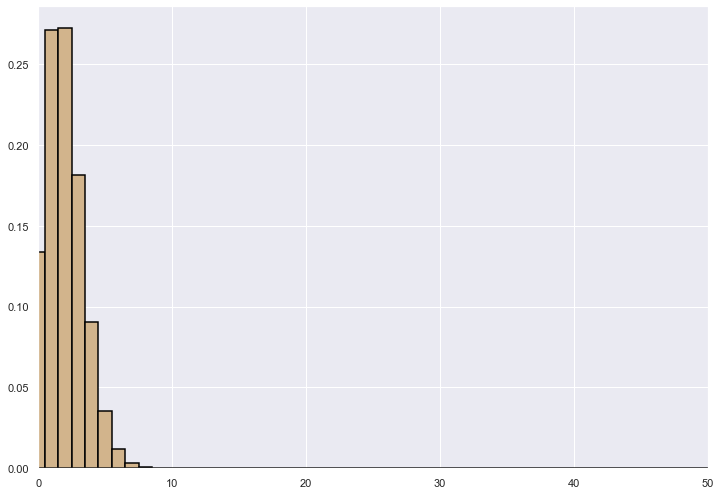

In [241]:
fig, ax = plt.subplots(1, 1)
n = 200
p = 0.01
x = np.arange(start = 0, stop = n + 1, step = 1)
probs_x = stats.binom.pmf(x, n, p)
getPlot = ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
plt.xlim(left=0, right=50)


#### Binomials with large $n$ but moderate $p$

+ By this we mean that $n$ is hundreds or more, while $p$ is an intermediate probability, not too close to 0 or 1. Let us plot the example where $n= 100$ while $p = 1/3$

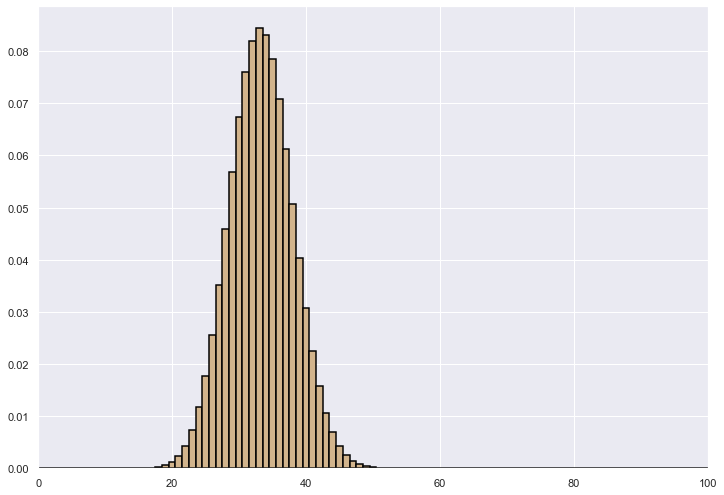

In [251]:
fig, ax = plt.subplots(1, 1)
n = 100
p = 1/3
x = np.arange(start = 0, stop = n + 1, step = 1)
probs_x = stats.binom.pmf(x, n, p)
ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
getPlot = plt.xlim(left=0, right=100)

+ The bar plot is starting to look like a bell shaped curve. That, as you have probably already guessed, is not a coincidence. **Abraham De Moivre** showed that as $n$ gets bigger (keeping $p$ moderate) this plot resembles more and more a normal curve, with  
$$\mu = n\cdot p, \sigma = \sqrt{n\cdot p\cdot q}$$
as was to be expected.
+ This was a very important result at that time, because working directly with these kind of binomials proved to be impossible. For example, if $X\sim B(100, 1/3)$ to compute the probability of the interval 
$$
\quad\\
P(25 \leq X \leq 35) = P(X = 25) + P(X = 26) + \cdots + P(X = 34) + P(X= 35)
\quad\\
$$
you need to compute quite a few terms like this one:
$$
\quad\\
P(X = 29) = \dbinom{100}{29}\left(\dfrac{1}{3}\right)^{29}\left(\dfrac{2}{3}\right)^{71}
\quad\\
$$
and in particular you will have to find out that
$$
\binom{100}{29} = \dfrac{100!}{29!\,\, 71!} = 
\dfrac{100\cdot 99 \cdot 98\cdots 73 \cdot 72}{29\cdot 28 \cdot 27\cdots  2\cdot 1} = 1917353200780443050763600
$$
+ Doing computations like that, particularly when they had to be done by hand, rendered the binomial useless. But the probability we are trying to compute is simply the area of the blue colored region in this plot:

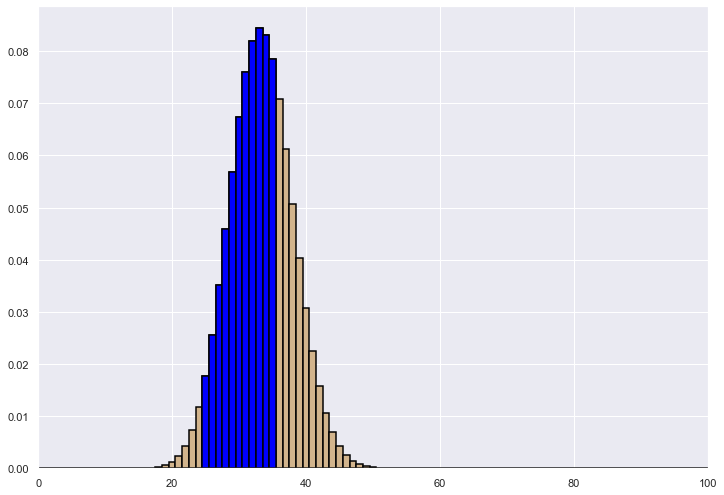

In [256]:
fig, ax = plt.subplots(1, 1)
n = 100
p = 1/3
x = np.arange(start = 0, stop = n + 1, step = 1)
probs_x = stats.binom.pmf(x, n, p)
ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
x1 = np.arange(start = 25, stop = 35 + 1, step = 1)
probs_x1 = stats.binom.pmf(x1, n, p)
ax.bar(x1, height = probs_x1, color='blue', width = 1, lw=1.5, edgecolor='black',linestyle="-")
getPlot = plt.xlim(left=0, right=100)

+ But in problems like this, and as $n$ gets bigger, the difference between the individual bars in this plot becomes less and less relevant. This is another instance of the transition from discrete to continuous. And when we look at this plot from that perspective, the answer is that we are trying to obtain the blue area under the normal curve. We can do that using integral calculus, which had just been discovered when de Moivre worked on this problem. 

+ The most important consequence of this, regardless of the technical details, is that this example led people to discover that they could define probability as the area under a curve. 

In [243]:
#from IPython.display import IFrame
#Frame("https://www.geogebra.org/m/q4buqzfp",800,800)

## Continuous Random Variables

## Normal Random Variables

In [244]:
import ipywidgets as widgets
slider = widgets.FloatSlider(
value = 7.5, 
min=5.0,
max=10.0,
step=0.1,
description="Input:")

slider

FloatSlider(value=7.5, description='Input:', max=10.0, min=5.0)

In [245]:
slider.value

7.5